In [783]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [784]:
df1 = pd.read_csv('Credit_card.csv')
df2 = pd.read_csv("Credit_card_label.csv")

In [785]:
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2


In [786]:
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [787]:
data = pd.merge(df1, df2, on = "Ind_ID" , how = "inner")

In [788]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2,0
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1,0
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2,0
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1,0
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2,0


In [789]:
data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5135460,F,N,Y,3,37800.0,Pensioner,Secondary / secondary special,Married,House / apartment,-13014.0,365243,1,0,0,0,NaN,5,0
1544,5041681,F,N,N,0,94500.0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,365243,1,0,1,0,NaN,2,0
1545,5041921,M,N,N,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,365243,1,0,1,0,NaN,2,0
1546,5048448,F,N,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,365243,1,0,0,0,NaN,2,0
1547,5044669,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,365243,1,0,0,0,NaN,2,0


In [790]:
data.shape

(1548, 19)

In [791]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [792]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [793]:
data.rename(columns = {"label" : "Approved_status"} , inplace = True)

In [794]:
df = data
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
Approved_status      int64
dtype: object

In [795]:
#Categorical Columns
categorical_features = []
for i in data.columns:
    if data[i].dtypes == "object":
        categorical_features.append(i)
categorical_features

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Type_Occupation']

In [796]:
#Numerical Columns
numerical_column =[]
for i in data.columns:
    if data[i].dtypes == 'int64' or data[i].dtypes == 'float64':
        numerical_column.append(i)
numerical_column

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'Approved_status']

In [797]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved_status
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2,0
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1,0
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2,0
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1,0
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2,0


In [798]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Approved_status      0
dtype: int64

()

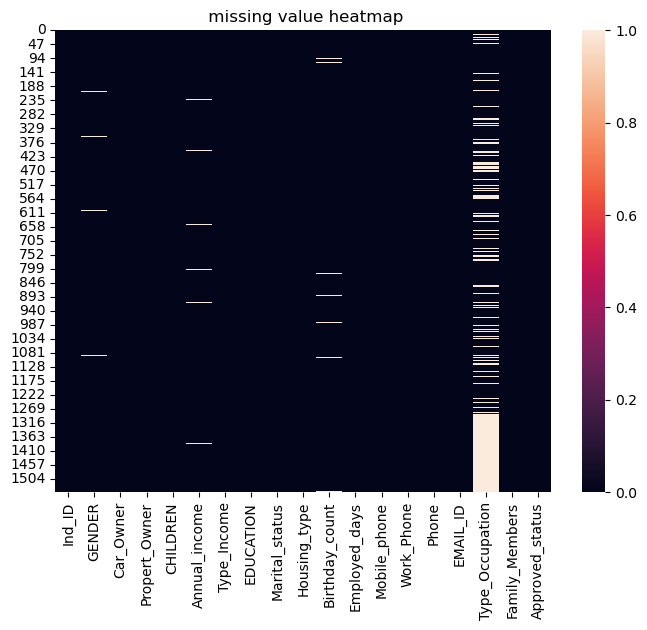

In [799]:
plt.figure(figsize = (8,6))
sns.heatmap(data.isnull())
plt.title(" missing value heatmap")
plt.show


In [800]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Approved_status'],
      dtype='object')

In [801]:
#dropping unnecessary columns
data.drop(columns = {'Mobile_phone','Work_Phone','Phone','EMAIL_ID','Type_Occupation'} , inplace = True)

In [802]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Family_Members',
       'Approved_status'],
      dtype='object')

In [803]:
df.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Family_Members      0
Approved_status     0
dtype: int64

In [804]:
data['Birthday_count']
age = []
for i in df['Birthday_count']:
    if i != np.nan:
        age.append(round(abs(i/365),2))
    else:
        age.append(np.nan)
age
df['Age'] = age

In [805]:
df['Employed_days']
Emp_status = []
for i in df['Employed_days']:
    if i<0:
        Emp_status.append('Employed')
    else:
        Emp_status.append('Unemployed')
df['Emp_status']  = Emp_status

In [806]:
df.drop(columns = {'Employed_days' , 'Birthday_count' }, inplace = True)

In [807]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Approved_status,Age,Emp_status
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,64.18,Employed
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,59.01,Employed
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,2,0,64.65,Employed
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,1,0,56.38,Employed
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,61.55,Employed


In [808]:
df.shape

(1548, 14)

In [809]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Family_Members,Approved_status,Age
count,1.548000e+03,1548.000000,1.525000e+03,1548.000000,1548.000000,1526.000000
mean,5.078920e+06,0.412791,1.913993e+05,2.161499,0.113049,43.946094
std,4.171759e+04,0.776691,1.132530e+05,0.947772,0.316755,11.587803
min,5.008827e+06,0.000000,3.375000e+04,1.000000,0.000000,21.110000
25%,5.045070e+06,0.000000,1.215000e+05,2.000000,0.000000,34.020000
50%,5.078842e+06,0.000000,1.665000e+05,2.000000,0.000000,42.905000
75%,5.115673e+06,1.000000,2.250000e+05,3.000000,0.000000,53.567500
max,5.150412e+06,14.000000,1.575000e+06,15.000000,1.000000,68.350000


In [810]:
#Check Unique Value in Categorical Columns
for i in data.columns:
    if data[i].dtypes == "object":
        print(df[i].unique())
        print("***********************************************************************")

['M' 'F' nan]
***********************************************************************
['Y' 'N']
***********************************************************************
['N' 'Y']
***********************************************************************
['Working' 'Commercial associate' 'State servant' 'Pensioner']
***********************************************************************
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Academic degree' 'Lower secondary']
***********************************************************************
['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
***********************************************************************
['House / apartment' 'Municipal apartment' 'With parents'
 'Co-op apartment' 'Office apartment' 'Rented apartment']
***********************************************************************
['Employed' 'Unemployed']
***********************************************************************


In [811]:
# Replacing Marital Status Column
df['Marital_status'] = df['Marital_status'].replace({"Single / not married" : "not married"} )

In [812]:
df['EDUCATION'] = df['EDUCATION'].replace({"Secondary / secondary special" : "Secondary Education"} )

# EDA

()

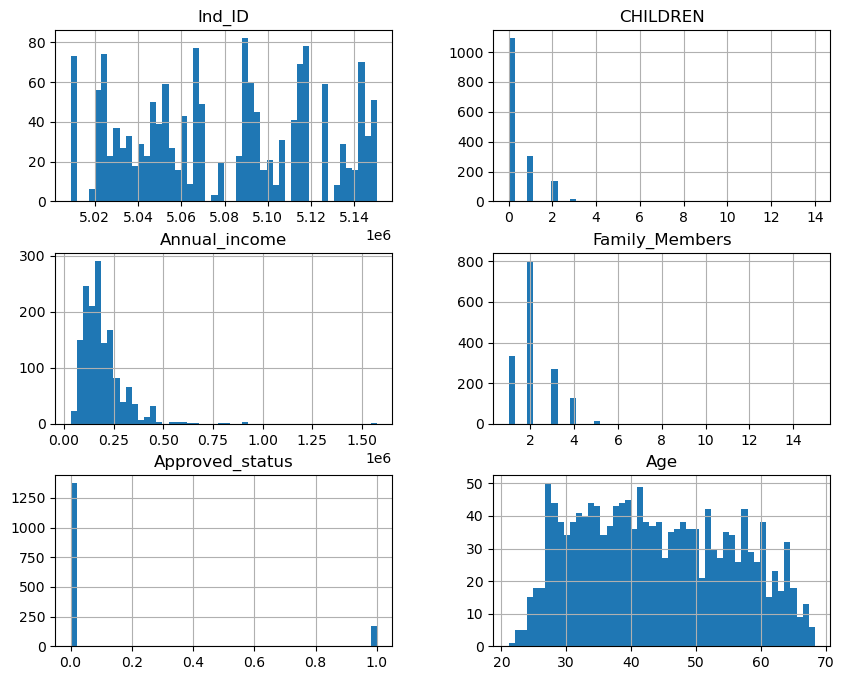

In [813]:
df.hist(bins = 50 , figsize = (10,8))
plt.show

()

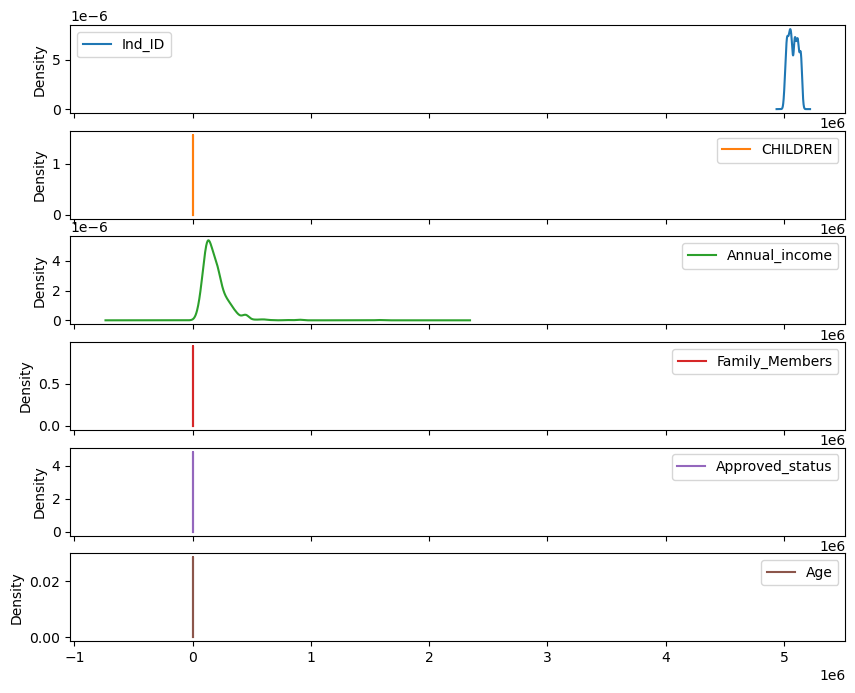

In [814]:
df.plot(kind = 'density' , subplots = True , figsize = (10,8))
plt.show

In [815]:
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        print(i)

Ind_ID
CHILDREN
Annual_income
Family_Members
Approved_status
Age


In [816]:
numerical_column

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'Approved_status']

In [817]:
df['Approved_status'].value_counts()

Approved_status
0    1373
1     175
Name: count, dtype: int64

In [823]:
plt.figure(figsize = (8,6))
fig = px.histogram(  x = df['CHILDREN'] ,title = "Children distribution by approval status", color = df['Approved_status'] )
fig.show()

<Figure size 800x600 with 0 Axes>

In [819]:
fig = px.histogram(  x = df['Annual_income'] ,title = "Income distribution by approval status", color = df['Approved_status'] )
fig.show()

In [820]:
fig = px.histogram(  x = df['Family_Members'] ,title = "Family_Members distribution by approval status", color = df['Approved_status'] )
fig.show()

In [821]:
fig = px.histogram(  x = df['Age'] ,title = "Age distribution by approval status", color = df['Approved_status'] )
fig.show()

KeyError: 'Type_Occupation'

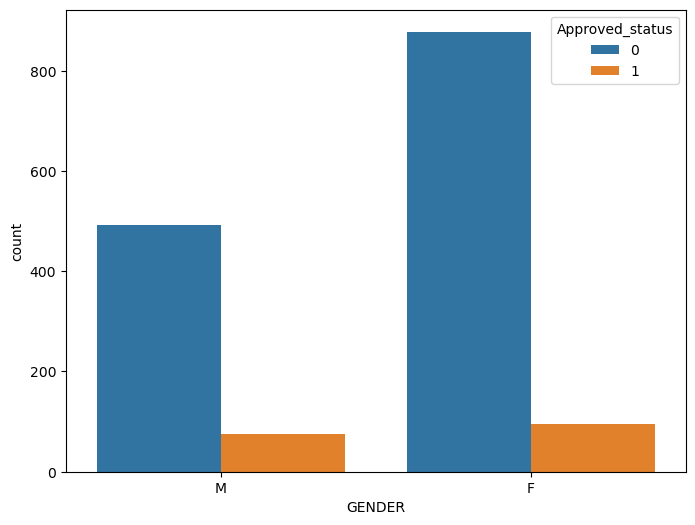

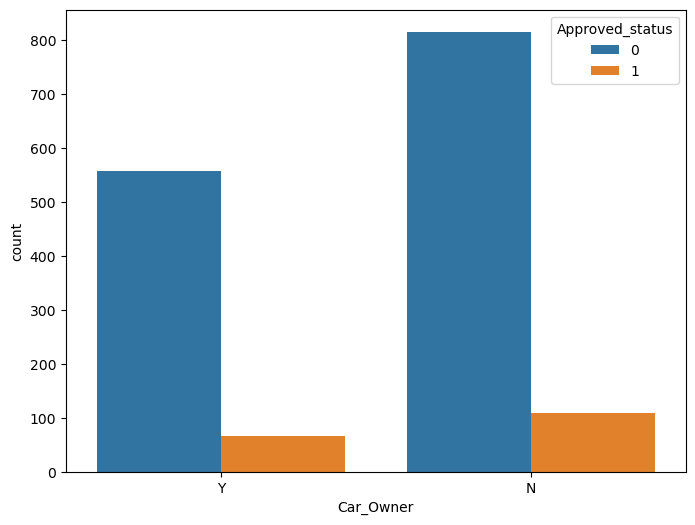

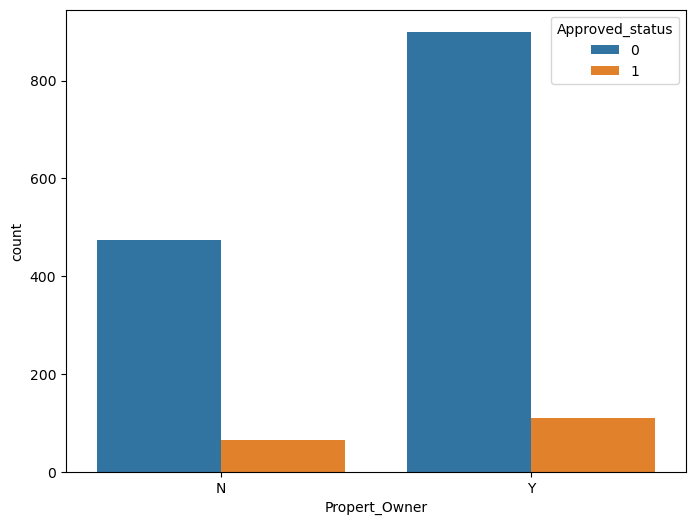

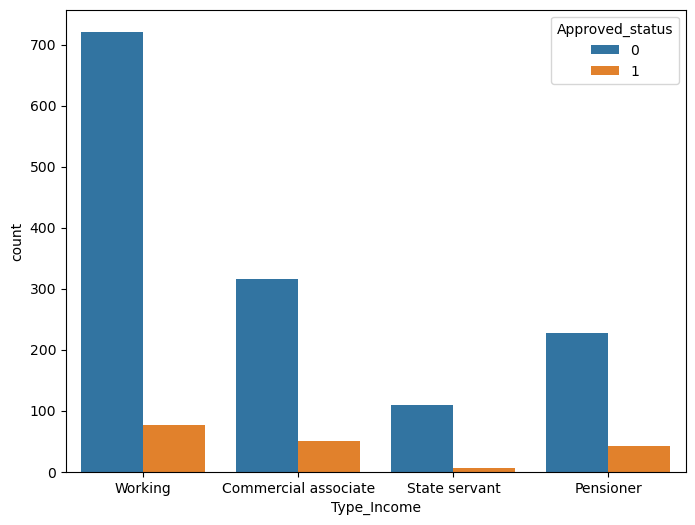

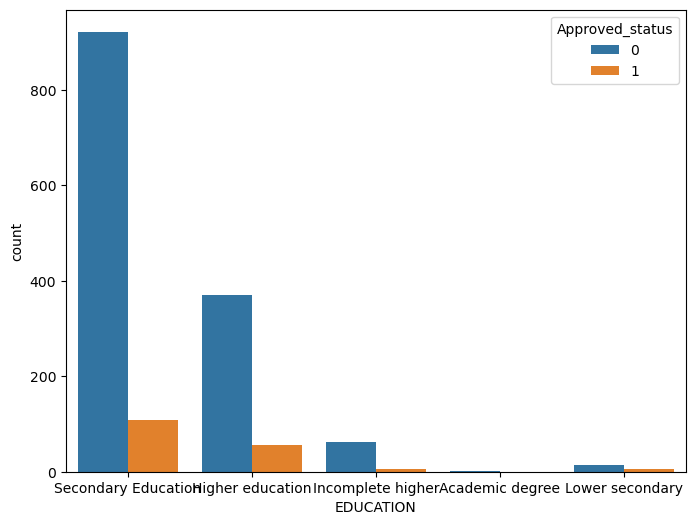

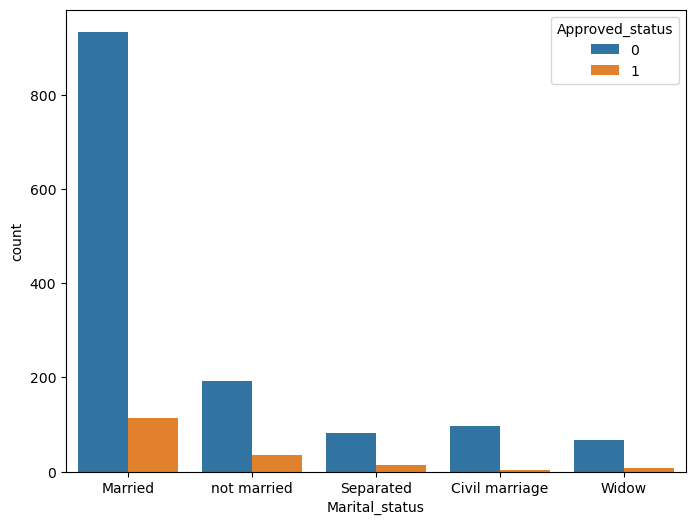

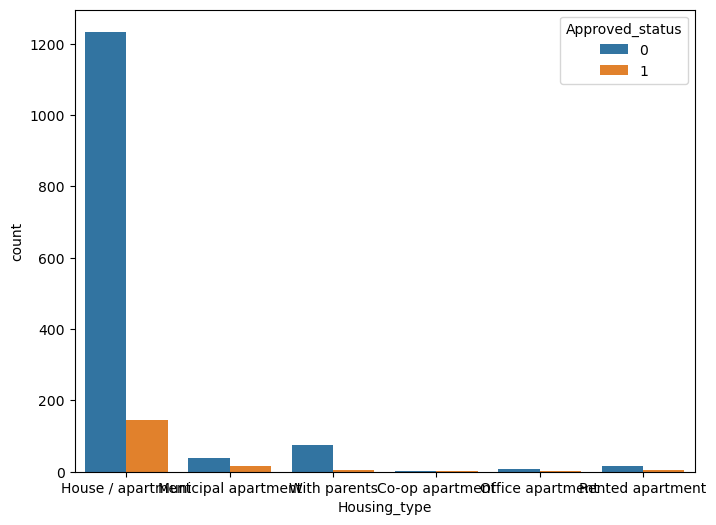

<Figure size 800x600 with 0 Axes>

In [822]:
categorical_features 
for i in categorical_features:
    plt.figure(figsize = (8,6))
    sns.countplot(df[i] , hue = df['Approved_status'])
#     plt.title(pd.concat([i," vs Approved Status"]))
    plt.show

()

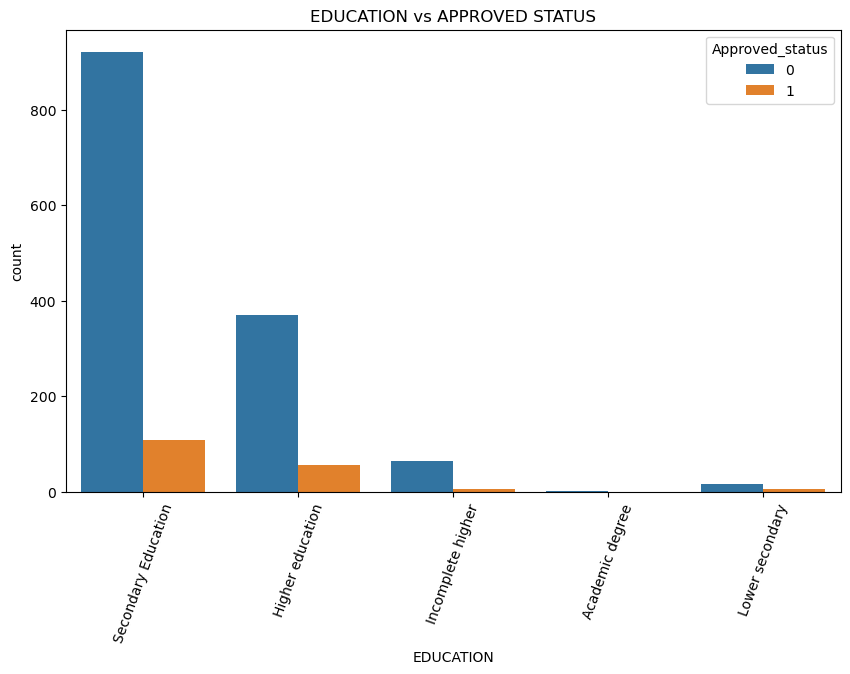

In [824]:
plt.figure(figsize = (10,6))
sns.countplot(df['EDUCATION'] , hue = df['Approved_status'])
plt.xticks(rotation = 70)
plt.title("EDUCATION vs APPROVED STATUS")
plt.show

()

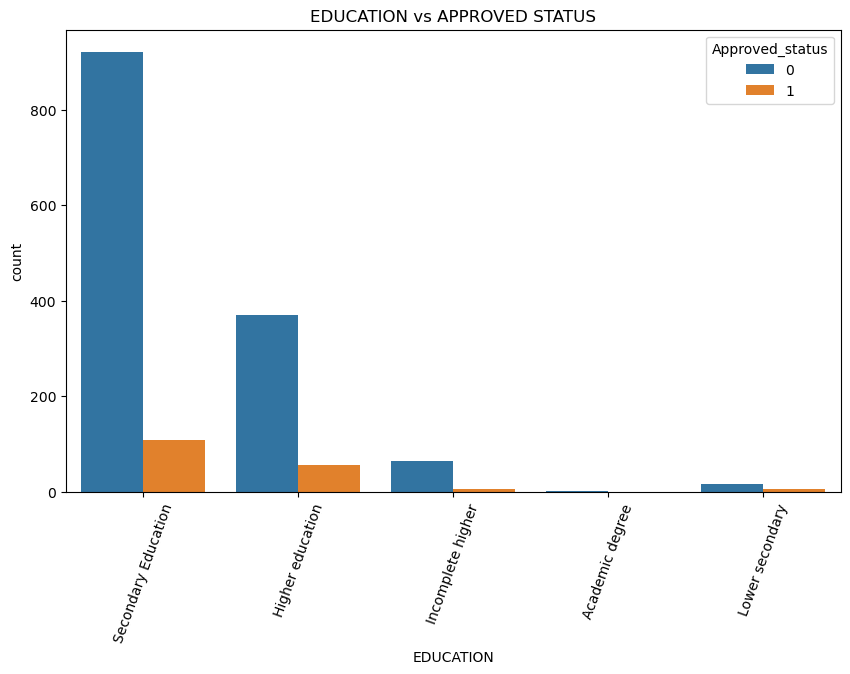

In [825]:
plt.figure(figsize = (10,6))
sns.countplot(df['EDUCATION'] ,x = df['Housing_type'], hue = df['Approved_status'])
plt.xticks(rotation = 70)
plt.title("EDUCATION vs APPROVED STATUS")
plt.show

In [826]:
# #boxplot to check the outliers
# for i in categorical_features:
#     sns.boxplot(df[i] , ax = [1//2,1%2] )
#     plt.show

In [827]:
#correlation matrix
# corr = df[numerical_column].corr()
# corr
# df[numerical_column]
numerical_column

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'Approved_status']

()

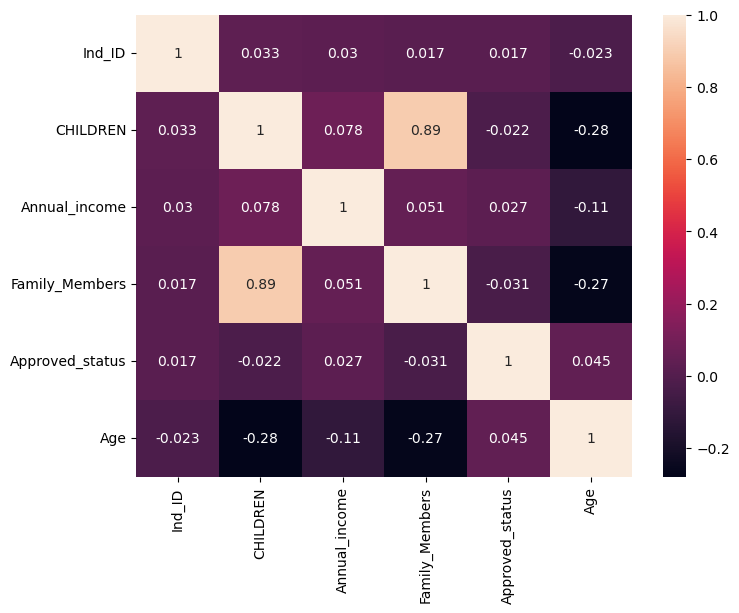

In [828]:
plt.figure(figsize = (8,6))
sns.heatmap(corr , annot = True)
plt.show

# Feature Engineering

In [829]:
df.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Family_Members      0
Approved_status     0
Age                22
Emp_status          0
dtype: int64

In [830]:
# Filling the na values of annual income
df['Annual_income'] = df['Annual_income'].fillna(df['Annual_income'].median())
df['Annual_income'].isnull().sum()

0

In [831]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Age'].isnull().sum()

0

In [832]:
df = df.dropna()

In [833]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Family_Members     0
Approved_status    0
Age                0
Emp_status         0
dtype: int64

In [834]:
df.shape

(1541, 14)

In [835]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Family_Members       int64
Approved_status      int64
Age                float64
Emp_status          object
dtype: object

In [836]:
df['Age'] = df['Age'].astype('int32')

In [837]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Family_Members       int64
Approved_status      int64
Age                  int32
Emp_status          object
dtype: object

# Handling the outliers

In [838]:
q1 = df['Annual_income'].quantile(0.25)
q3 = df['Annual_income'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)
df['Annual_income'] = df['Annual_income'].clip(lower = lower_limit, upper = upper_limit )
df['Annual_income']

0       157500.0
1       247500.0
2       166500.0
3       112500.0
4       103500.0
          ...   
1543     37800.0
1544     94500.0
1545    135000.0
1546    202500.0
1547     76500.0
Name: Annual_income, Length: 1541, dtype: float64

In [839]:
q1 = df['CHILDREN'].quantile(0.25)
q3 = df['CHILDREN'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)
df['CHILDREN'] = df['CHILDREN'].clip(lower = lower_limit, upper = upper_limit )
df['CHILDREN']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1543    2.5
1544    0.0
1545    0.0
1546    0.0
1547    0.0
Name: CHILDREN, Length: 1541, dtype: float64

In [840]:
q1 = df['Family_Members'].quantile(0.25)
q3 = df['Family_Members'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)
df['Family_Members'] = df['Family_Members'].clip(lower = lower_limit, upper = upper_limit )
df['Family_Members']

0       2.0
1       1.0
2       2.0
3       1.0
4       2.0
       ... 
1543    4.5
1544    2.0
1545    2.0
1546    2.0
1547    2.0
Name: Family_Members, Length: 1541, dtype: float64

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1541 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   CHILDREN         1541 non-null   float64
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   EDUCATION        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Family_Members   1541 non-null   float64
 11  Approved_status  1541 non-null   int64  
 12  Age              1541 non-null   int32  
 13  Emp_status       1541 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 174.6+ KB


In [842]:
df['CHILDREN'] = df['CHILDREN'].astype('int32')
df['Family_Members'] = df['Family_Members'].astype('int32')

In [843]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int32
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Family_Members       int32
Approved_status      int64
Age                  int32
Emp_status          object
dtype: object

In [844]:
#     Check the outliers by box plot

In [845]:
# saving the clean data
df.to_excel("credit_card_cleaned_data.xlsx", index = False)

In [846]:
df.drop(columns = {'Ind_ID'}, inplace = True)

In [847]:
df.shape

(1541, 13)

# Data Wrangling

In [848]:
# seperate Independent variables and Dependent Variables
#independent variables
IND = df.drop(columns = {'Approved_status'})

In [849]:
# Dependent Variables
DEP = df['Approved_status']
DEP.shape

(1541,)

In [850]:
DEP.value_counts()

Approved_status
0    1371
1     170
Name: count, dtype: int64

# Feature Encoding

In [851]:
categorical_features = []
for i in IND.columns:
    if IND[i].dtypes == "object":
        categorical_features.append(i)
categorical_features

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Emp_status']

In [852]:
# Dummy encoding
IND_NEW = pd.get_dummies(IND , columns = categorical_features , drop_first = True)

In [853]:
IND_NEW.shape

(1541, 24)

()

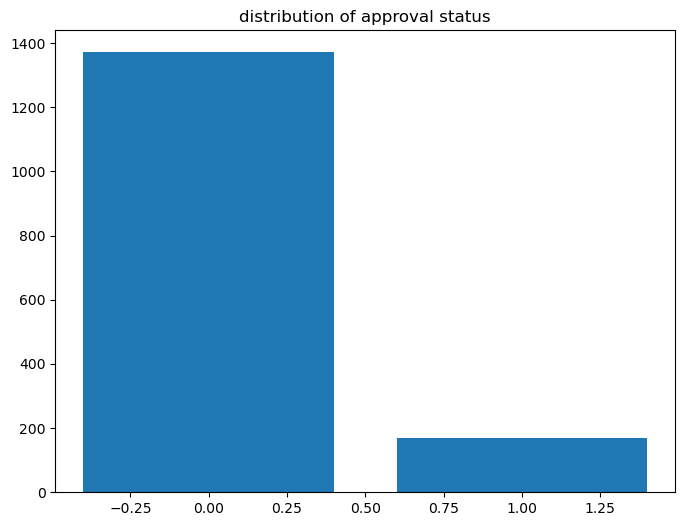

In [854]:
# Data Transformation
approval_counts = df['Approved_status'].value_counts()
approval_counts
plt.figure(figsize = (8,6))
plt.bar(approval_counts.index ,  approval_counts.values)
plt.title("distribution of approval status")
plt.show

In [855]:
# Imbalance handling of the target variable (approval_counts)
# using smote for the balancing
# Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for 
# increasing the number of cases in your dataset in a balanced way.
smote = SMOTE(random_state = 42)
x, y = smote.fit_resample( IND_NEW , DEP )

In [856]:
print(x.shape)
print(y.shape)

(2742, 24)
(2742,)


In [857]:
y.value_counts()

Approved_status
0    1371
1    1371
Name: count, dtype: int64

()

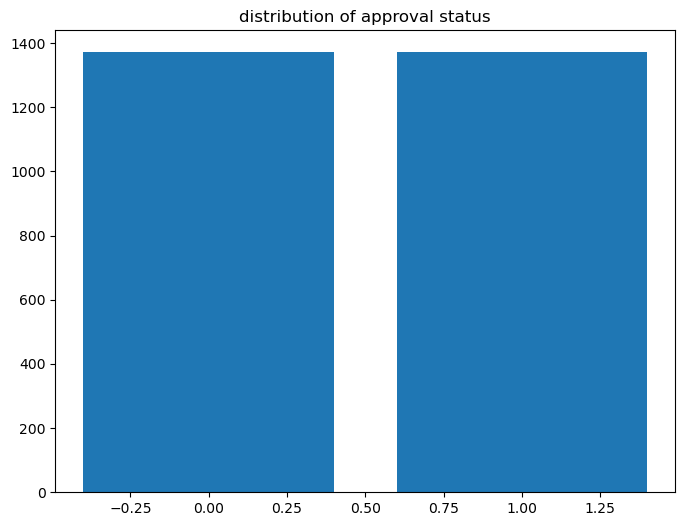

In [858]:
approval_counts = y.value_counts()
plt.figure(figsize = (8,6))
plt.bar(approval_counts.index ,  approval_counts.values)
plt.title("distribution of approval status")
plt.show

In [859]:
# data splitting into training and testing
from sklearn import model_selection
X_TRAIN , X_TEST , Y_TRAIN , Y_TEST = model_selection.train_test_split(x, y, test_size = 0.2 , random_state = 42)

In [860]:
X_TRAIN.head(10)

,CHILDREN,Annual_income,Family_Members,Age,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,...,Marital_status_Married,Marital_status_Separated,Marital_status_Widow,Marital_status_not married,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Emp_status_Unemployed
2273,0,315000.000000,2,37,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1435,0,135000.000000,2,59,False,False,True,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2229,0,112500.000000,2,55,True,False,True,True,False,False,...,True,False,False,False,True,True,False,False,False,True
1609,1,380250.000000,3,45,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,False,False
1860,0,380250.000000,1,39,True,False,True,False,False,True,...,False,False,False,True,True,True,False,False,False,False
1290,0,54000.000000,2,67,False,False,True,True,False,False,...,True,False,False,False,True,False,False,False,False,True
247,0,360000.000000,2,34,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2249,0,135000.000000,2,43,False,True,True,False,False,True,...,True,False,False,False,True,False,False,False,False,False
2535,0,65788.155234,1,58,True,False,True,True,False,False,...,True,False,True,False,True,False,False,False,False,True
347,1,225000.000000,3,28,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [861]:
# X_TEST = X_TEST.values.reshape(-1,1)

In [862]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_TRAIN = scaler.fit_transform(X_TRAIN)
X_TEST = scaler.fit_transform(X_TEST)

In [863]:
X_TEST

array([[-0.52419051,  1.83674297, -1.30229395, ..., -0.1557361 ,
        -0.20431772, -0.51758901],
       [ 1.14895246, -0.04598191,  1.18885371, ..., -0.1557361 ,
        -0.20431772,  1.93203484],
       [-0.52419051, -0.31494261, -1.30229395, ..., -0.1557361 ,
        -0.20431772,  1.93203484],
       ...,
       [-0.52419051,  0.22297879, -0.05672012, ..., -0.1557361 ,
        -0.20431772, -0.51758901],
       [-0.52419051,  0.49193949, -1.30229395, ..., -0.1557361 ,
        -0.20431772,  1.93203484],
       [-0.52419051, -0.20735833, -0.05672012, ..., -0.1557361 ,
        -0.20431772, -0.51758901]])

# MODELLING

In [864]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [865]:
# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [866]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

In [867]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_TRAIN, Y_TRAIN)

LogisticRegression()

In [868]:
LR_PRED_TRAIN = LR.predict(X_TRAIN)
LR_PRED_TEST = LR.predict(X_TEST)

In [869]:
LR_TRAINING_ACCURACY = accuracy_score(Y_TRAIN , LR_PRED_TRAIN)*100
print("LR_TRAINING_ACCURACY = " , round(LR_TRAINING_ACCURACY,2))

LR_TESTING_ACCURACY = accuracy_score(Y_TEST , LR_PRED_TEST)*100
print("LR_TESTING_ACCURACY = " ,round(LR_TESTING_ACCURACY,2))

CROSS_VAL_SCORE = cross_val_score(LR , X_TEST , Y_TEST ).mean()*100
print("CROSS_VAL_SCORE = " , round(CROSS_VAL_SCORE),2)

LR_TRAINING_ACCURACY =  80.53
LR_TESTING_ACCURACY =  77.78
CROSS_VAL_SCORE =  78 2


In [870]:
# Support Vector Machines
svc = SVC()
svc.fit(X_TRAIN , Y_TRAIN)

SVC()

In [871]:
svc_pred_train = svc.predict(X_TRAIN)
svc_pred_test = svc.predict(X_TEST)

In [872]:
SVC_TRAINING_ACCURACY = accuracy_score(Y_TRAIN , svc_pred_train)*100
print("SVC_TRAINING_ACCURACY = " , round(SVC_TRAINING_ACCURACY,2))

SVC_TESTING_ACCURACY = accuracy_score(Y_TEST , svc_pred_test)*100
print("SVC_TESTING_ACCURACY = " ,round(SVC_TESTING_ACCURACY,2))

# CROSS_VAL_SCORE_SVC = cross_val_score(SVC , X_TEST , Y_TEST ).mean()*100
# print("CROSS_VAL_SCORE_SVC = " , round(CROSS_VAL_SCORE_SVC),2)

SVC_TRAINING_ACCURACY =  89.42
SVC_TESTING_ACCURACY =  85.79


In [873]:
class_report_lr = classification_report(Y_TEST,svc_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       271
           1       0.92      0.79      0.85       278

    accuracy                           0.86       549
   macro avg       0.87      0.86      0.86       549
weighted avg       0.87      0.86      0.86       549



In [874]:
# RANDOM FOREST
RF = RandomForestClassifier(n_estimators=300,random_state=25)
RF.fit(X_TRAIN , Y_TRAIN)

RandomForestClassifier(n_estimators=300, random_state=25)

In [875]:
RF_TRAIN_PRED = RF.predict(X_TRAIN)
RF_TEST_PRED = RF.predict(X_TEST)

In [876]:
RF_Train_Accuracy = accuracy_score(Y_TRAIN,RF_TRAIN_PRED)*100
RF_Test_Accuracy = accuracy_score(Y_TEST,RF_TEST_PRED)*100
RF_CV = cross_val_score(RF,X_TEST,Y_TEST,cv=5,scoring="accuracy").mean()*100
print("RF_Train_Accuracy = " , round((RF_Train_Accuracy),2))
print("RF_Test_Accuracy = ", round((RF_Test_Accuracy),2))
print("RF_CV = " , round((RF_CV),2))

RF_Train_Accuracy =  99.36
RF_Test_Accuracy =  93.44
RF_CV =  85.24


In [877]:
class_report_lr = classification_report(Y_TEST,RF_TEST_PRED)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       271
           1       0.96      0.91      0.93       278

    accuracy                           0.93       549
   macro avg       0.94      0.93      0.93       549
weighted avg       0.94      0.93      0.93       549



In [878]:
# XG_BOOST_CLASSFIER
XGB = XGBClassifier(max_depth=30,n_estimators=100,subsample=1.0,random_state=2)
XGB.fit(X_TRAIN , Y_TRAIN )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [879]:
XGB_TRAIN_PRED = XGB.predict(X_TRAIN)
XGB_TEST_PRED = XGB.predict(X_TEST)

In [880]:
XGB_Train_Accuracy = accuracy_score(Y_TRAIN,XGB_TRAIN_PRED)*100
XGB_Test_Accuracy = accuracy_score(Y_TEST,XGB_TEST_PRED)*100
XGB_CV = cross_val_score(XGB,X_TEST,Y_TEST,cv=5,scoring="accuracy").mean()*100
print("XGB_Train_Accuracy = " , round((XGB_Train_Accuracy),2))
print("XGB_Test_Accuracy = ", round((XGB_Test_Accuracy),2))
print("XGB_CV = " , round((XGB_CV),2))

XGB_Train_Accuracy =  99.36
XGB_Test_Accuracy =  93.81
XGB_CV =  84.52


In [881]:
class_report_lr = classification_report(Y_TEST , XGB_TEST_PRED)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       271
           1       0.95      0.92      0.94       278

    accuracy                           0.94       549
   macro avg       0.94      0.94      0.94       549
weighted avg       0.94      0.94      0.94       549



In [882]:
final_data = pd.DataFrame({"Models":['LR','SVM','RF','XGBOOST',],
                          "TRAIN_ACC_SCORE":[LR_TRAINING_ACCURACY,
                                       SVC_TRAINING_ACCURACY,
                                    
                                       RF_Train_Accuracy,
                                       XGB_Train_Accuracy,
                                      ],
                           "TEST_ACC_SCORE":[LR_TESTING_ACCURACY,
                                            SVC_TESTING_ACCURACY,

                                            RF_Test_Accuracy,
                                            XGB_Test_Accuracy],
                         "CV_SCORE":[CROSS_VAL_SCORE,
                                     CROSS_VAL_SCORE_SVC,
                                    
                                     RF_CV,
                                    XGB_CV]})
print(final_data)

    Models  TRAIN_ACC_SCORE  TEST_ACC_SCORE   CV_SCORE
0       LR        80.528956       77.777778  78.320267
1      SVM        89.420885       85.792350  78.320267
2       RF        99.361605       93.442623  85.244370
3  XGBOOST        99.361605       93.806922  84.518766
